# YouUniverse
_[Large-Scale Channel and Video Metadata from English-Speaking YouTube]_

- Data is made available through [Zenodo](https://doi.org/10.5281/zenodo.4650046).
- For context and an explanation of how data collection was done, see [the paper](https://arxiv.org/abs/2012.10378).
- Please cite this dataset if you use it:

~~~bibtex
@inproceedings{ribeiro2021youniverse,
      title={YouNiverse: Large-Scale Channel and Video Metadata from English-Speaking YouTube}, 
      author={Ribeiro, Manoel Horta and West Robert},
      year={2021},
      booktitle={{Proceedings of the 15th International AAAI Conference 
                  on Weblogs and Social Media (ICWSM'21)}}
}
~~~

## Channel Data

The file `df_channels_en.tsv.gz` contains data related to channels. 
It aggregates both basic stats from channels obtained from `channelcrawler.com`, 
as well as rankings obtained from `socialblade.com`.

- `category_cc`: category of the channel.
- `join_date`: join date of the channel.
- `channel`: channel id.
- `name_cc`: name of the channel.
- `subscribers_cc`: number of subscribers.
- `videos_cc`: number of videos.
- `subscriber_rank_sb`: rank in terms of number of subscribers.
- `weights`: weights cal

| category_cc | join_date  | channel                  | name_cc      | subscribers_cc | videos_cc | subscriber_rank_sb |  weights |
|:------------|:-----------|:-------------------------|:-------------|---------------:|----------:|-------------------:|---------:|
| Gaming      | 2015-08-26 | UCi_AR7WqvXa6LEnRn_7ES7A | Thunder Play |          11500 |       849 |             877395 |  11.175  |
| Sports      | 2016-02-04 | UCgVlxaBsBkmMh2SUgrzG1ZQ | Thunder Prod |          76000 |        61 |             198340 |  5.5295  |
| Music       | 2013-09-14 | UCNBYpqbD64tkuuFS-NNhkfQ | Thunder Rain |          33700 |        58 |             382980 |  6.5855  |


## Time Series Data

The file `df_timeseries_en.csv.gz` contains data related to time series. 
We have a data point for each channel and each week:

- `channel`: channel id.
- `category`: category of the channel as assigned by `socialblade.com` according to the last 10 videos at time of crawl.
- `datetime`: Week related to the data point.
- `views`: Total number of views the channel had this week.
- `delta_views`: Delta views obtained this week.
- `subs`: Total number of subscribers the channel had this week.
- `delta_subs`: Delta subscribers obtained this week.
- `videos`: Total number of videos the channel had this week.
- `delta_videos`: Delta videos obtained this week.
- `activity`: Number of videos published in the last 15 days.

| channel                  | category           | datetime   | views   | delta_views | subs | delta_subs | videos | delta_videos | activity |
|:-------------------------|:-------------------|:-----------|--------:|------------:|-----:|-----------:|-------:|-------------:|---------:|
| UCBJuEqXfXTdcPSbGO9qqn1g | Film and Animation | 2017-07-03 | 202495  |           0 |  650 |   0        |      5 |            0 |        3 |
| UCBJuEqXfXTdcPSbGO9qqn1g | Film and Animation | 2017-07-10 | 394086  |      191591 | 1046 | 396        |      6 |            1 |        1 |
| UCBJuEqXfXTdcPSbGO9qqn1g | Film and Animation | 2017-07-17 | 835394  |      441308 | 1501 | 456        |      6 |            0 |        1 |
| UCBJuEqXfXTdcPSbGO9qqn1g | Film and Animation | 2017-07-17 | 835394  |      441308 | 1501 | 456        |      6 |            0 |        1 |

Some facts about it:

- This file contains 18,872,499 data points belonging to 153,550 channels. 
- In average, it contains 2.8 years of data for each channel
- Data goes from early January 2015 to the end of September 2019. Not all channels have the complete time frame.
- Additionally we filtered all channels that were not in english given their video metadata (see `Raw Channels').

## Video Metadata

The file `yt_metadata_en.jsonl.gz` contains metadata data related to ~73M videos from ~137k channels.
Below we show the data recorded for each of the video

    {
        'categories': 'People & Blogs', 
        'channel_id': 'UCzzYnZ8GIzfB1Vr3hk2Nj9Q', 
        'crawl_date': '2019-11-02 09:01:05.328421', 
        'description': 'See more at http://www.standstrongcompany.com Fitness Keep it healthy at (...)', 
        'dislike_count': 8, 
        'display_id': 'x72dBgcVPFI', 
        'duration': 187, 
        'like_count': 91,
        'tags': 'Tiger Fitness,TigerFitness,fitness,workout,diet,health,pre workout,ab workout,(...)', 
        'title': 'Slingshot for Squats? | Tiger Fitness', 
        'upload_date': '2019-04-21 00:00:00', 
        'view_count': 2559
    }
    
Some facts about it:
- This data was crawled from YouTube between 2019-10-29 and 2019-11-23.
- It contains 72,924,794 videos created between 2005-05-24 to 2019-11-20.

In [1]:
import pandas as pd
import gzip
import json
import pyarrow.ipc as ipc
import pyarrow.feather as feather
import os 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


from utility import *

In [2]:
PATH = os.getcwd()
PATH_TO_DATA = PATH + "/data_youniverse"  
CATEGORY = "Science & Technology"

In [3]:
df_channels_en = pd.read_csv(f"{PATH_TO_DATA}/df_channels_en.tsv.gz", compression="infer", sep="\t") 

# print the top 10 channels with the most subscribers
display(df_channels_en.nlargest(n=10, columns = ['subscribers_cc']))

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
55,Music,2006-03-13,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,112139463,13839,102.0,2.087
0,Gaming,2010-04-29,UC-lHJZR3Gqxm24_Vd_AJ5Yw,PewDiePie,101000000,3956,3.0,2.087
3,Howto & Style,2016-11-15,UC295-Dw_tDNtZXFeAPAW6Aw,5-Minute Crafts,60600000,3591,9.0,2.087
1,Education,2006-09-01,UCbCmjCuTUZos6Inko4u57UQ,Cocomelon - Nursery ...,60100000,458,7.0,2.087
2,Entertainment,2006-09-20,UCpEhnqL0y41EpW2TvWAHD7Q,SET India,56018869,32661,8.0,2.087
4,Sports,2007-05-11,UCJ5v_MCY6GNUBTO8-D3XoAg,WWE,48400000,43421,11.0,2.087
5,Entertainment,2007-01-15,UCIwFjwMjI0y7PDBVEO9-bkQ,Justin Bieber,46574085,134,12.0,2.087
7,Sports,2009-03-17,UCRijo3ddMTht_IHyNSNXpNQ,Dude Perfect,45800000,213,14.0,2.087
6,Music,2014-03-12,UCFFbwnve3yF62-tVXkTyHqg,Zee Music Company,43451109,4241,13.0,2.087
9,Music,2006-08-08,UC0C-w0YjGpqDXGB8IHb662A,Ed Sheeran,42000000,154,17.0,2.087


In [4]:
# available categories in the dataset
df_channels_en.category_cc.unique()

array(['Gaming', 'Education', 'Entertainment', 'Howto & Style', 'Sports',
       'Music', 'Film and Animation', 'Comedy', 'Nonprofits & Activism',
       'People & Blogs', 'News & Politics', 'Science & Technology',
       'Pets & Animals', 'Autos & Vehicles', 'Travel & Events', nan],
      dtype=object)

In [5]:
df_timeseries_en = pd.read_csv(f"{PATH_TO_DATA}/df_timeseries_en.tsv.gz", compression="infer", sep="\t") # 41.5 seconds | category = Science & Technology

In [6]:
df_channels_filt = df_channels_en[df_channels_en['category_cc'] == CATEGORY]
df_timeseries_filt = df_timeseries_en[df_timeseries_en['category'] == CATEGORY]

df_channels_filt.nlargest(n=10, columns = ['subscribers_cc'])

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
131,Science & Technology,2010-12-21,UCsTcErHg8oDvUnTzoqsYeNw,Unbox Therapy,15300000,1672,206.0,2.087
153,Science & Technology,2007-07-30,UC6nSFpj9HTCZ5t-N3Rm3-HA,Vsauce,14700000,370,236.0,2.087
156,Science & Technology,2015-10-19,UCOhHO2ICt0ti9KAh-QHvttQ,Technical Guruji,13979890,2539,240.0,2.087
271,Science & Technology,2012-05-18,UCe_vXdMrHHseZ_esYUskSBw,CrazyRussianHacker,11200000,1411,444.0,2.087
299,Science & Technology,2005-06-22,UCE_M8A5yxnLfW0KghEeajjw,Apple,9970000,291,489.0,2.087
340,Science & Technology,2015-05-01,UCAL3JXZSzSm8AlZyD3nQdBA,Primitive Technology...,9797999,48,554.0,2.087
323,Science & Technology,2008-03-21,UCBJycsmduvYEL83R_U4JriQ,Marques Brownlee,9400000,1148,530.0,2.087
342,Science & Technology,2008-11-25,UCXuqSBlHAE6Xw-yeJA0Tunw,Linus Tech Tips,9160000,4700,558.0,2.087
312,Science & Technology,2011-10-20,UCY1kMZp36IQSyNx_9h4mpCg,Mark Rober,8610000,74,510.0,2.087
416,Science & Technology,2005-09-18,UCK8sQmJBp8GCxrOtXWBpyEA,Google,7890000,2271,705.0,2.087


In [8]:
# merge channel and time series on channel id
df_channel_timeseries_filt = pd.merge(df_channels_filt, df_timeseries_filt, on='channel')


In [14]:
CHANNEL_ID = df_channel_timeseries_filt['channel'].unique()

In [15]:
pct = []
for channel_id in CHANNEL_ID:
    metadata = df_channel_timeseries_filt[df_channel_timeseries_filt['channel'] == channel_id]
    pct.append(len(metadata)/metadata['videos_cc'].max()*100)
    
    

In [46]:
# checking for vsauce
vsauce_metadata = df_channel_timeseries_filt[df_channel_timeseries_filt['channel'] == 'UC6nSFpj9HTCZ5t-N3Rm3-HA']
vsauce_metadata.head(10)

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights,category,datetime,views,delta_views,subs,delta_subs,videos,delta_videos,activity
156,Science & Technology,2007-07-30,UC6nSFpj9HTCZ5t-N3Rm3-HA,Vsauce,14700000,370,236.0,2.087,Science & Technology,2016-10-10 00:00:00,1.067197e+09,4.105332e+05,1.103573e+07,0.000000,319,0,1
157,Science & Technology,2007-07-30,UC6nSFpj9HTCZ5t-N3Rm3-HA,Vsauce,14700000,370,236.0,2.087,Science & Technology,2016-10-17 00:00:00,1.070071e+09,2.873733e+06,1.105665e+07,20923.875000,319,0,0
158,Science & Technology,2007-07-30,UC6nSFpj9HTCZ5t-N3Rm3-HA,Vsauce,14700000,370,236.0,2.087,Science & Technology,2016-10-24 00:00:00,1.072475e+09,2.403916e+06,1.108125e+07,24604.125000,319,0,0
159,Science & Technology,2007-07-30,UC6nSFpj9HTCZ5t-N3Rm3-HA,Vsauce,14700000,370,236.0,2.087,Science & Technology,2016-10-30 23:00:00,1.074569e+09,2.093702e+06,1.109812e+07,16868.823187,319,0,0
160,Science & Technology,2007-07-30,UC6nSFpj9HTCZ5t-N3Rm3-HA,Vsauce,14700000,370,236.0,2.087,Science & Technology,2016-11-06 23:00:00,1.077290e+09,2.721106e+06,1.111709e+07,18968.463272,320,1,1
161,Science & Technology,2007-07-30,UC6nSFpj9HTCZ5t-N3Rm3-HA,Vsauce,14700000,370,236.0,2.087,Science & Technology,2016-11-13 23:00:00,1.081477e+09,4.187435e+06,1.114440e+07,27310.255208,321,1,2
162,Science & Technology,2007-07-30,UC6nSFpj9HTCZ5t-N3Rm3-HA,Vsauce,14700000,370,236.0,2.087,Science & Technology,2016-11-20 23:00:00,1.085455e+09,3.977812e+06,1.117074e+07,26334.546875,321,0,1
163,Science & Technology,2007-07-30,UC6nSFpj9HTCZ5t-N3Rm3-HA,Vsauce,14700000,370,236.0,2.087,Science & Technology,2016-11-27 23:00:00,1.087512e+09,2.056639e+06,1.118688e+07,16147.354167,321,0,0
164,Science & Technology,2007-07-30,UC6nSFpj9HTCZ5t-N3Rm3-HA,Vsauce,14700000,370,236.0,2.087,Science & Technology,2016-12-04 23:00:00,1.089135e+09,1.623016e+06,1.120259e+07,15702.286458,322,1,1
165,Science & Technology,2007-07-30,UC6nSFpj9HTCZ5t-N3Rm3-HA,Vsauce,14700000,370,236.0,2.087,Science & Technology,2016-12-11 23:00:00,1.094337e+09,5.202529e+06,1.124083e+07,38244.500000,323,1,2


In [53]:
# number of missing videos
pct = (len(vsauce_metadata)/vsauce_metadata['videos_cc'].max())*100
print(f"vsauce has {pct:.2f}% missing videos in the dataset 'df_channel_timeseries_filt'")

vsauce has 42.16% missing videos in the dataset 'df_channel_timeseries_filt'


In [15]:
helper_filt = read_and_filter_feather(f"{PATH_TO_DATA}/yt_metadata_helper.feather")
helper_filt.head()

,categories,channel_id,dislike_count,display_id,duration,like_count,upload_date,view_count
0,Science & Technology,UCzWQYUVCpZqtN93H8RR44Qw,503.0,XPSYzLZ7xKU,200,15328.0,2019-10-03,357909.0
1,Science & Technology,UCzWQYUVCpZqtN93H8RR44Qw,84.0,WWD_1Nq6iwQ,308,6498.0,2019-10-02,151492.0
2,Science & Technology,UCzWQYUVCpZqtN93H8RR44Qw,36.0,0U1rkFraBQo,399,2723.0,2019-10-01,63057.0
3,Science & Technology,UCzWQYUVCpZqtN93H8RR44Qw,111.0,NMknT8vKOL8,292,5274.0,2019-09-30,229530.0
4,Science & Technology,UCzWQYUVCpZqtN93H8RR44Qw,156.0,s0P9hj1R_Zw,486,10025.0,2019-09-29,322653.0


In [16]:
yt_metadata_filtered = load_and_filter_jsonl_gz_file_by_chunks(f"{PATH_TO_DATA}/yt_metadata_en.jsonl.gz")
yt_metadata_filtered.to_csv(f"{PATH_TO_DATA}/yt_film&animation.csv", index=False) # save the results
yt_metadata_filtered.head()

,categories,channel_id,crawl_date,dislike_count,display_id,duration,like_count,tags,upload_date,view_count
0,Science & Technology,UCzWQYUVCpZqtN93H8RR44Qw,2019-11-03 22:21:31.549534,503,XPSYzLZ7xKU,200,15328,"seeker,science,curiosity,education,explain,lea...",2019-10-03 00:00:00,357909.0
1,Science & Technology,UCzWQYUVCpZqtN93H8RR44Qw,2019-11-03 22:21:32.224556,84,WWD_1Nq6iwQ,308,6498,"seeker,science,curiosity,education,explain,lea...",2019-10-02 00:00:00,151492.0
2,Science & Technology,UCzWQYUVCpZqtN93H8RR44Qw,2019-11-03 22:21:32.905550,36,0U1rkFraBQo,399,2723,"SICK,science,health,health news,health tech,te...",2019-10-01 00:00:00,63057.0
3,Science & Technology,UCzWQYUVCpZqtN93H8RR44Qw,2019-11-03 22:21:33.614600,111,NMknT8vKOL8,292,5274,"NASA,Arizona State University,asteroid,asteroi...",2019-09-30 00:00:00,229530.0
4,Science & Technology,UCzWQYUVCpZqtN93H8RR44Qw,2019-11-03 22:21:34.300370,156,s0P9hj1R_Zw,486,10025,"focal point,documentary,interview,short doc,sc...",2019-09-29 00:00:00,322653.0


# Science and Technology

In [55]:
yt_metadata_filt = pd.read_csv(f"{PATH_TO_DATA}/yt_science&technology.csv")
yt_metadata_filt['upload_date'] = yt_metadata_filt['upload_date'].astype('datetime64[ns]')

In [96]:
video_count = (
    yt_metadata_filt.groupby(pd.Grouper(key="upload_date", freq="W")).count().channel_id
for year in range(2005, 2020):
    total_videos_year = video_count[video_count.index.year.isin([year])].sum()
    print("We have {:,} video in {}".format(total_videos_year, year))

We have 3 video in 2005
We have 90 video in 2006
We have 3,065 video in 2007
We have 17,057 video in 2008
We have 32,508 video in 2009
We have 52,058 video in 2010
We have 82,849 video in 2011
We have 126,703 video in 2012
We have 168,318 video in 2013
We have 185,879 video in 2014
We have 220,075 video in 2015
We have 279,209 video in 2016
We have 394,585 video in 2017
We have 475,465 video in 2018
We have 365,140 video in 2019


Text(0.5, 1.0, 'Number of videos uploaded each week')

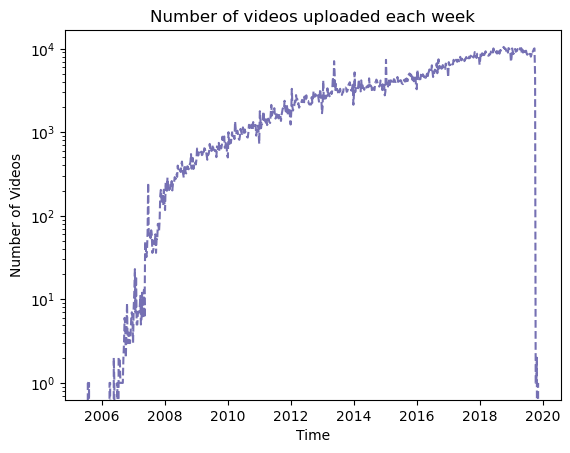

In [97]:
plt.plot(video_count, color="#7570b3", ls="--", label="\% videos uploaded")
plt.yscale("log")
plt.ylabel("Number of Videos")
plt.xlabel("Time")
plt.title("Number of videos uploaded each week")

In [99]:
# The following graph shows how many videos each channel uploads to YouTube per year.
yt_metadata_filt["yearNumber"] = yt_metadata_filt["upload_date"].dt.year
vd_cnt_by_id_yr = (
    yt_metadata_filt.groupby(["channel_id", "yearNumber"])
    .count()
    .categories.unstack()
    .reset_index()
)
vd_cnt_by_id_yr.columns.name = None
vd_cnt_by_id_yr_summary = vd_cnt_by_id_yr.describe()

Text(0.5, 1.0, 'The 2nd and 3rd quartiles of yearly video upload frequency')

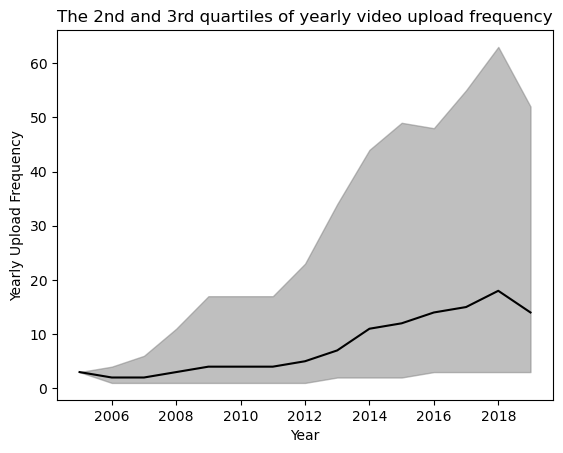

In [100]:

plt.fill_between(
    x=list(vd_cnt_by_id_yr_summary.columns.values),
    y1=list(vd_cnt_by_id_yr_summary.loc["25%", :]),
    y2=list(vd_cnt_by_id_yr_summary.loc["75%", :]),
    alpha=0.5,
    color="gray",
)
plt.plot(vd_cnt_by_id_yr_summary.loc["50%", :], color="black")
plt.xlabel("Year")
plt.ylabel("Yearly Upload Frequency")
plt.title("The 2nd and 3rd quartiles of yearly video upload frequency")
# here we choose quartiles, since the mean would be significantly affected by extremely high yearly upload rates

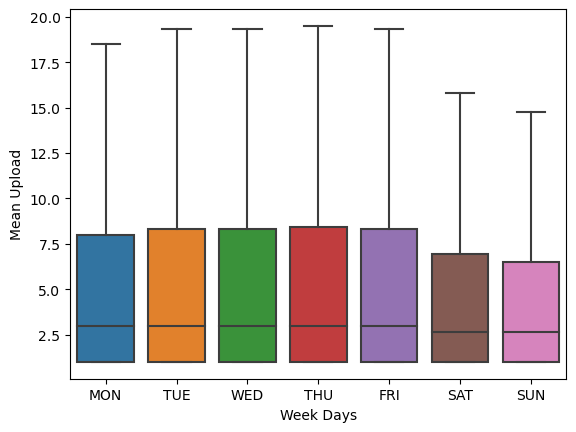

In [101]:
yt_metadata_filt["weekNumber"] = yt_metadata_filt["upload_date"].dt.weekday
vd_cnt_by_id_wk = (
    yt_metadata_filt.groupby(["channel_id", "weekNumber", "yearNumber"])
    .count()
    .categories.unstack()
    .reset_index()
)
vd_cnt_by_id_wk.columns.name = None
vd_cnt_by_id_wk["mean_upload"] = vd_cnt_by_id_wk.iloc[:, 2:].mean(axis=1, skipna=True)


labels = ["MON", "TUE", "WED", "THU", "FRI", "SAT", "SUN"]
ax = sns.boxplot(
    x="weekNumber", y="mean_upload", data=vd_cnt_by_id_wk, showfliers=False
).set(xlabel="Week Days", ylabel="Mean Upload", xticklabels=labels)

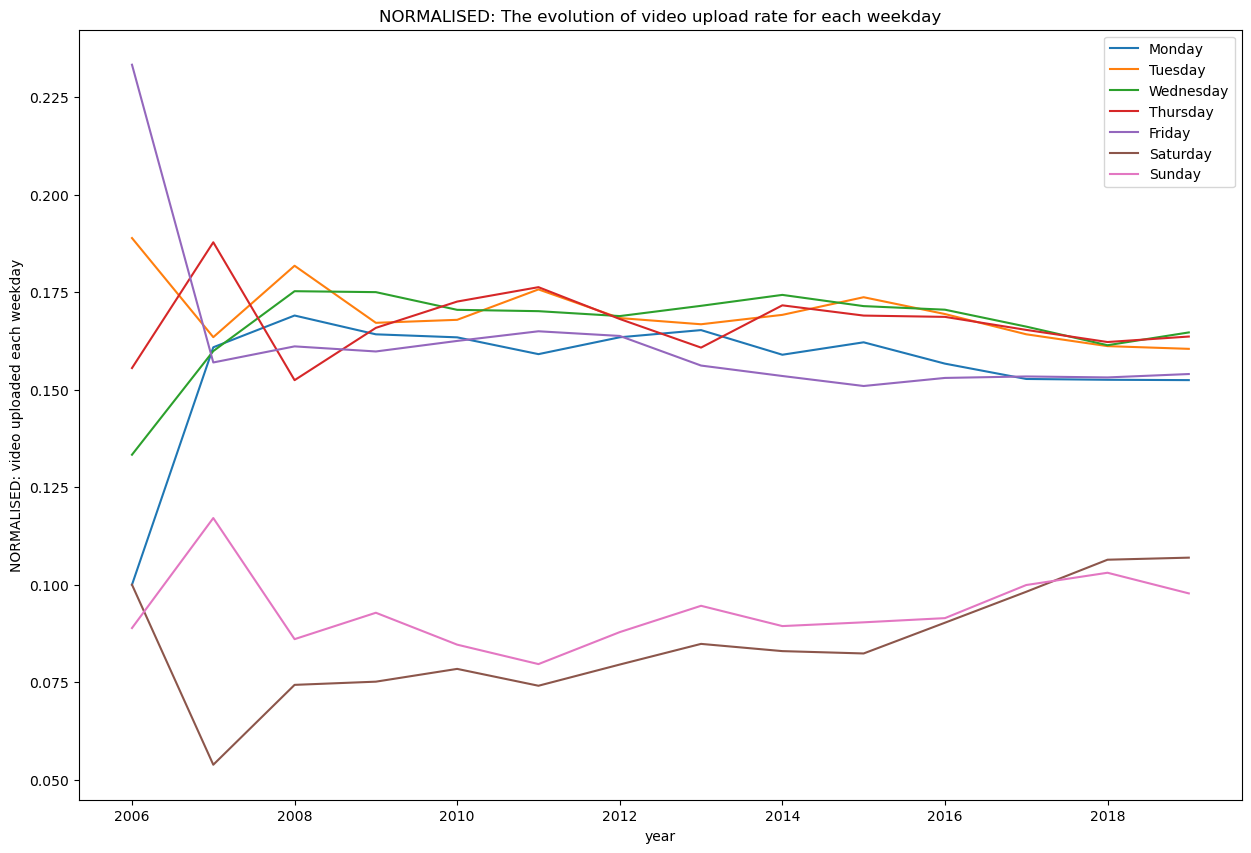

In [102]:
vd_cnt_by_wk = (
    yt_metadata_filt.groupby(["weekNumber", "yearNumber"])
    .count()
    .categories.unstack()
    .reset_index()
)
vd_cnt_by_wk.columns.name = None

vd_cnt_by_wk_norm = vd_cnt_by_wk.iloc[:, 2:] / vd_cnt_by_wk.iloc[:, 2:].sum(skipna=True)
plt.rcParams["figure.figsize"] = (15, 10)
plt.plot(vd_cnt_by_wk_norm.T)
plt.legend(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)
plt.xlabel("year")
plt.ylabel("NORMALISED: video uploaded each weekday")
plt.title("NORMALISED: The evolution of video upload rate for each weekday")
plt.show()


In [84]:
tags_exploded = yt_metadata_filt['tags'].str.split(',').explode()
n_tags_exploded = tags_exploded.unique()
print(f"Number of unique tags: {len(n_tags_exploded)}")

Number of unique tags: 6201887


An error occurred for year 2016: name 'plt' is not defined
An error occurred for year 2017: name 'plt' is not defined
An error occurred for year 2018: name 'plt' is not defined


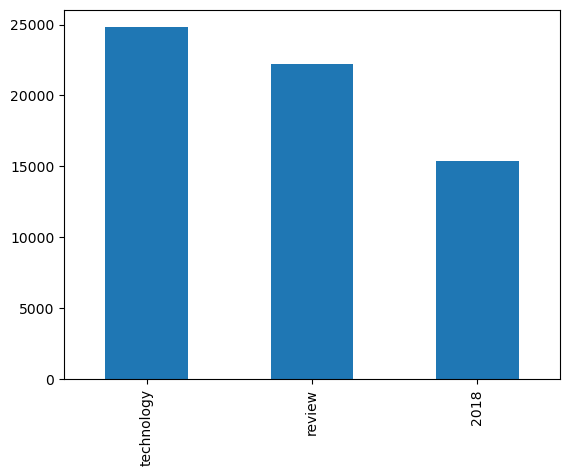

In [77]:
from utility import *

years = range(2016, 2019)  # or whatever years are applicable
for year in years:
    yt_metadata_filt_year = yt_metadata_filt[yt_metadata_filt['upload_date'].dt.year == year]
    if not yt_metadata_filt_year.empty:
        try:
            # Assuming the function plot_topN_tag is correctly defined and can handle cases with less than N tags
            plot_topN_tag(yt_metadata_filt_year['tags'], 3)
        except Exception as e:
            print(f"An error occurred for year {year}: {e}")
    else:
        print(f"No data available for year {year}")